# Pattern recognition

### Preliminar version of image recognition.

Packages needed
>* [polarTransform](https://github.com/addisonElliott/polarTransform)
>* [astropy](http://docs.astropy.org/en/stable/install.html)
>* [timedistance](https://github.com/AngelMartinezC/Local-Helioseismology) (By the moment this module is not used)

### Sources
* [Object detection (OpenCV)](https://www.learnopencv.com/image-recognition-and-object-detection-part1/ "OpenCV")
* [easy-tensorflow](https://github.com/easy-tensorflow/easy-tensorflow)

---

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from timedistance import td  # not needed by the moment
import time
import polarTransform

The next step is to find the greatest value of the cube array for every frame. Then it is selected the frame with the greatest value in order to find is pixel-values. These pixel values will be used as center for the sunquake.

In [2]:
cube = fits.getdata("Data/HMIDoppler.difference.fits",0)

value = np.array([cube[i].max() for i in range(len(cube))])
frame = np.where(value==value.max())[0][0]
max_data = np.where(cube[frame]==cube[frame].max())

y = max_data[0][0]
x = max_data[1][0]

"Max value:  {0:.2f}  ---  check value:  {1:.2f} ".format(value.max(),cube[frame][y,x])

'Max value:  3056.45  ---  check value:  3056.45 '

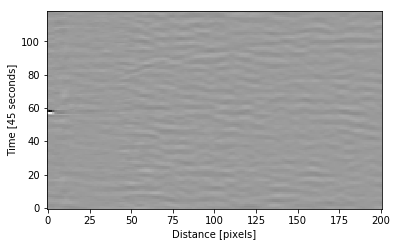

In [3]:
# Testing the real sunquake with timedistance

flare = "Data/HMIDoppler.difference.fits"

# 192-260 the values of x and y found by eye 

# image = td(flare, x0=x, y0=y, theta0=230, theta1=240, savfile=None,rad0=0,radius=120)
# final = image.tdplot(save=None,colorbar=False,plot=False)

t0 = 230*np.pi/180
t1 = 240*np.pi/180

image_td = []
for ij in range(len(cube)):
            polarImage, ptSettings = polarTransform.convertToPolarImage(cube[ij],\
                                center=[x, y], initialRadius = 0, \
                                finalRadius = 140, initialAngle = t0, finalAngle = t1)
            slices = []
            for i in range(len(polarImage[:,0])):
                slices.append(np.mean(polarImage[i,:]))
            image_td.append(slices)

plt.ylabel('Time [45 seconds]')
plt.xlabel('Distance [pixels]')
plt.imshow(image_td,origin='lower',cmap='Greys_r')

In [4]:
def ML(x1,y1):

    s = time.time()
    b=0
    ii=2
    images = []
    while b < 240:
        ii = ii+1
        b = ii*10
        a = b-10

        t0 = a*np.pi/180
        t1 = b*np.pi/180

        # The next step is a conditional if to break the loop when the condition 
        # of sunquake is reached

        image_td = []
        for ij in range(len(cube)):
                    polarImage, ptSettings = polarTransform.convertToPolarImage(cube[ij],\
                                        center=[x, y], initialRadius = 0, \
                                        finalRadius = 120, initialAngle = t0, finalAngle = t1)
                    slices = []
                    for i in range(len(polarImage[:,0])):
                        slices.append(np.mean(polarImage[i,:]))
                    image_td.append(slices)
        images.append(image_td)
        
    e = time.time()
    print("\nTime is {0:.3} s".format(e-s))
    
    return images
    
images = ML(x,y)


Time is 13.6 s


In [5]:
# Optional using timedistance module

def using_timedistance_module():

    def ML(x1,y1):

        s = time.time()
        b=0
        i=2
        images = []
        while b < 240:
            i = i+1
            b = i*10
            a = b-10

            # The next step is a conditional if to break the loop when the condition 
            # of sunquake is reached

            image = td(flare, x0=x1, y0=y1, theta0=a, theta1=b, savfile=None,rad0=0,radius=None)
            final = image.tdplot(save=None,colorbar=False,plot=False,noprint=False,notime=False)
            images.append(final)

        e = time.time()
        print("\nTime is {0:.3} s".format(e-s))
        return images

    images = ML(x,y)